In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('music2.csv',encoding='gbk')
data.head()

,小程序介绍
0,荔枝FM，人人都是播客，最具原创活力的播客平台。通过荔枝FM小程序，可随时随地收听声音电台直播。
1,乐坛天王天后、音乐大咖、创作奇才齐聚碎乐！ 汪峰、李健、邓紫棋、薛之谦、谭维维、赵雷、常石磊...
2,音乐旅途，和他们一起听歌
3,爱弹唱 吉他曲谱 尤克里里曲谱 吉他教学 尤克里里教学 吉他 尤克里里
4,听广播电台，有声小说，相声小品，新闻，音乐，脱口秀，历史，军事就用蜻蜓FM！\n你想听的我们...


In [6]:
introduction = data.小程序介绍.values.tolist()

In [7]:
fileObject = open('introduction1.txt', 'w')
for line in introduction:
    fileObject.write(line)
    fileObject.write('\n')
fileObject.close()

In [9]:
from PIL import Image
import jieba
#jieba.enable_parallel(4)
# Setting up parallel processes :4 ,but unable to run on Windows
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import os
# jieba.load_userdict("txt\userdict.txt")
# add userdict by load_userdict()
from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

stopwords_path = d + '/stopwords.txt'
# Chinese fonts must be set
#font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

# the path to save worldcloud
imgname1 = d + '/intro1.jpg'
imgname2 = d + '/intro2.jpg'
# read the mask / color image taken from
back_coloring = imread(path.join(d, d + '/alice.jpg'))
alice_mask = np.array(Image.open(path.join(d, "music1.jpg")))
# Read the whole text.
text = open(path.join(d, d + '/introduction1.txt')).read()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [10]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [11]:
def jieba_processing_txt(text):
    #for word in userdict_list:
       # jieba.add_word(word)   
    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)




In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14.0, 7.0)

In [13]:
wc = WordCloud(font_path='simhei.ttf', background_color="white", max_words=200, mask=alice_mask,
               max_font_size=400, random_state=42, width=2000, height=1000, margin=4)

In [14]:
wc.generate(jieba_processing_txt(text))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 5.661 seconds.
Prefix dict has been built succesfully.


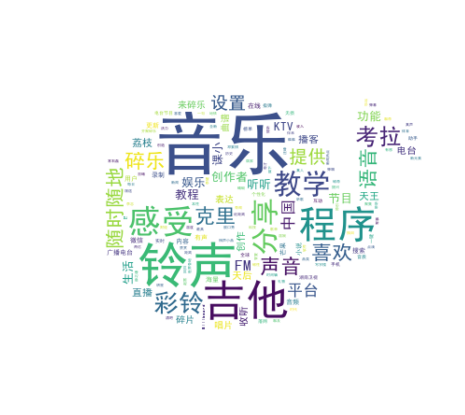

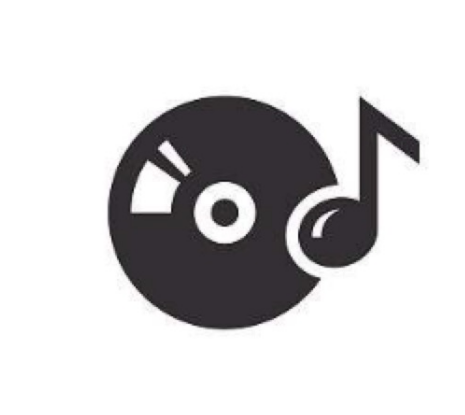

In [15]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()